## <font color='Pink'> Análise de Dados Para Campanhas de Marketing de Instituições Financeiras </font>

### <font color='black'> Definição do Problema </font>
#### <font color='white'>Vamos analisar dados referentes a campanhas de marketing direto de uma instituiçã bancária portuguesa. As campanhas de marketing foram baseadas em ligações telefônicas.Muitas vezes, era necessário mais de um contato para o mesmo cliente, a fim de saber se o produto (depósito bancário a prazo) seria ('sim') ou não ('não') adquirido pelo cliente. O dataset apresenta diversos problemas pois é um dataset com dados reais. Daremos ênfase ao tratamento de valores ausentes, mas também faremos a limpeza e tratamento de outros eventuais problemas que detectarmos. </font>


#### <font color='black'>Instalando e Carregando os Pacotes </font>

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### <font color='black'>Carregando os Dados </font> 

In [4]:
# Carregando o dataset
df = pd.read_csv("dados/dataset.csv")

In [5]:
# Shape
df.shape

(45211, 19)

In [12]:
# Amostra
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### <font color='black'>Análise Exploratória </font>

In [8]:
# Informações sobre cada variável
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [9]:
# Temos valores nulos?
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [10]:
# Temos valores nulos? (Apenas de uma forma diferente(SOMANDO))
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [16]:
# Fazemos o split da coluna jobedu e criamos a coluna job com o primeiro elemento antes da vírgula 
#Jobedu possui duas informações em apenas uma tabela (depois fazemos drop na coluna Jobedu)
df['job'] = df["jobedu"].apply(lambda x:x.split(",")[0])

In [19]:
# Fazemos o split da coluna jobedu e criamos a coluna education com o segundo elemento antes da vírgula
df['education'] = df["jobedu"].apply(lambda x:x.split(",")[1])

In [20]:
# Drop da coluna "jobedu" 
df.drop(["jobedu"], axis = 1, inplace = True)

In [21]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### <font color='black'> Tratamento de Valores Ausentes </font>

age           20
salary        26
month         50
response      30

In [22]:
# Calcula o percentual de valores ausentes na variável age
df.age.isnull().mean()*100

0.0442370219636814

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 20 linhas no dataset) ou podemos aplicar imputação.

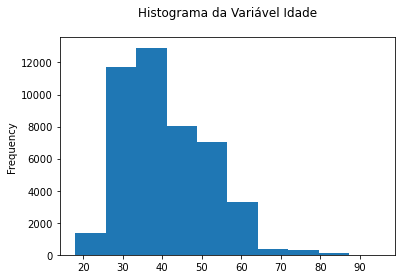

In [23]:
# Histograma
df.age.plot(kind = "hist")
plt.title("Histograma da Variável Idade\n")
plt.show()

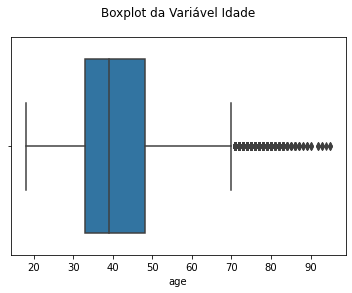

In [24]:
# Boxplot
sns.boxplot(df.age)
plt.title("Boxplot da Variável Idade\n")
plt.show()

In [25]:
# Vamos verificar qual é a média de idade.
df.age.mean()

40.93565090394105

In [26]:
# Vamos verificar qual é a mediana, valor do meio da distribuição quando os dados estão ordenados.
df.age.median()

39.0

In [27]:
# Vamos verificar qual é a moda, o valor que aparece com mais frequência.
df.age.mode()

0    32.0
Name: age, dtype: float64

#### <font color='black'> Vamos imputar os valores ausentes da variável age com uma medida de tendência central </font>

In [28]:
# Vamos preencher com a moda pois são poucos valores ausentes e assim alteramos muito pouco o padrão nos dados.
df.age.fillna("32", inplace = True)

In [29]:
# Agora convertemos para int
df.age = df.age.astype("int")

In [30]:
# Tipo da variável
df.age.dtypes

dtype('int32')

In [31]:
# Média
df.age.mean()

40.93169803808808

In [32]:
# Mediana
df.age.median()

39.0

In [33]:
# Percentual de valores ausentes
df.age.isnull().mean()*100

0.0

#### Tratamento de Valores Ausentes

##### variável mês:

In [6]:
# Valores ausentes na variável
df.month.isnull().sum()

50

In [7]:
# Percentual de valores ausentes
df.month.isnull().mean()*100

0.11059255490920351

Como o percentual é menor que 30% não podemos eliminar a coluna

In [8]:
# Tipo da variável
df.month.dtypes

dtype('O')

In [9]:
# Categorias da variável
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [10]:
# Vamos imputar com a moda, o valor mais frequente da variável, pois são poucos registros
df.month.mode()

0    may, 2017
Name: month, dtype: object

In [11]:
# Imputação com a moda
df.month.fillna("may, 2017", inplace = True)

In [12]:
# Valores ausentes tratados com sucesso
df.month.isnull().sum()

0

#### Váriavel Salário

In [13]:
# Valores ausentes na variável
df.salary.isnull().sum()

26

In [14]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.05750812855278583

Como o percentual é baixo não podemos eliminar a coluna e nessa mesma coluna possui valor 0.0 para salário (O valor zero é provavelmente um outlier).

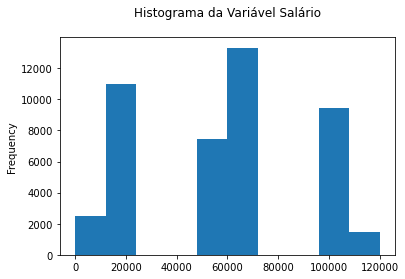

In [15]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

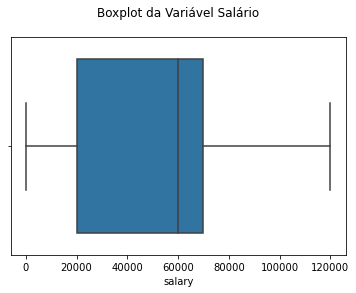

In [16]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [17]:
# Vamos verificar qual é a média de idade.
df.salary.mean()

57008.65331415293

In [18]:
# Vamos verificar qual é a mediana.
df.salary.median()

60000.0

In [19]:
# Vamos verificar qual é a moda.
df.salary.mode()

0    20000.0
Name: salary, dtype: float64

In [20]:
# Vamos preencher com a mediana pois os dados parecem assimétricos (nesse caso a média não pode ser usada) 
# e o valor mais frequente está muito abaixo da média e da mediana (por isso não usaremos a moda)
df.salary.fillna("60000", inplace = True)

In [21]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [22]:
# Histograma 
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

TypeError: no numeric data to plot

no numeric data to plot (A variável estar como Object)

In [23]:
# Convertemos para o tipo float
df.salary = df.salary.astype("float")

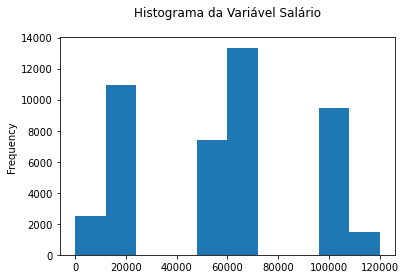

In [24]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

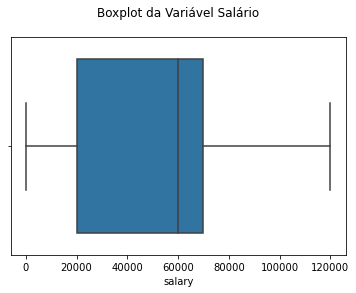

In [25]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [26]:
# Registros para cada salário
df.salary.value_counts()

20000.0     9725
100000.0    9454
60000.0     9195
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
Name: salary, dtype: int64

In [27]:
# Replace do zero pela mediana
df['salary'] = df['salary'].replace(0, df['salary'].median())

In [28]:
# Registros para cada salário
df.salary.value_counts()

20000.0     9725
60000.0     9483
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
Name: salary, dtype: int64

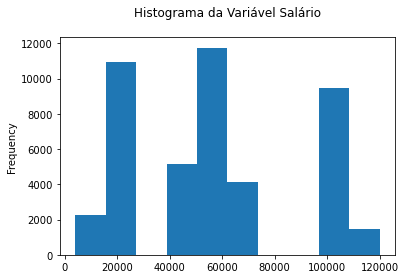

In [29]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

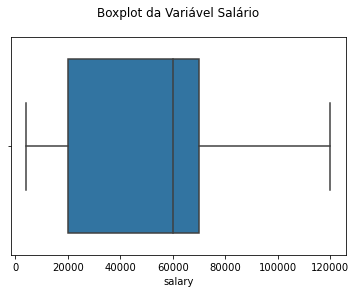

In [30]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [31]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.0